In [1]:
from random import random
from math import exp
import numpy as np

def Pb0(t,b0,b1): return (b1-t)/(b1-b0)
def Pb1(t,b0,b1): return (t-b0)/(b1-b0)
def G(t,s,b0,b1): return -(b1-s)*(t-b0)/(b1-b0) if t<s else - (b1-t)*(s-b0)/(b1-b0) 

def Y(t,y0,y1,b0,b1): 
    sol = Pb0(t,b0,b1)*y0 + Pb1(t,b0,b1)*y1
    l = 2 # russian roulette rate
    if random()*l<1: 
        S = b0+random()*(b1-b0)
        sol += l*G(t,S,b0,b1) * Y(S,y0,y1,b0,b1)*(b1-b0)
    return sol 
    
def soltest(t,y0,y1,b0,b1,nsim): return sum(Y(t,y0,y1,b0,b1) for _ in range(nsim))/nsim

nsim = 10**2
B0 = np.arange(-1,0,0.2)
B1 = np.arange(1,0,-0.2)
T = [b0+(b1-b0)*random() for b0,b1 in zip(B0,B1) ]

for t,b0,b1 in zip(T,B0,B1):
    print((soltest(t,exp(b0),exp(b1),b0,b1,nsim)-exp(t))/exp(t))

-0.11611271379450594
0.017338620155783243
-0.03035618746659506
-0.00012532082982273643
-0.0008444865260153166


0.5
0.9942513905318492


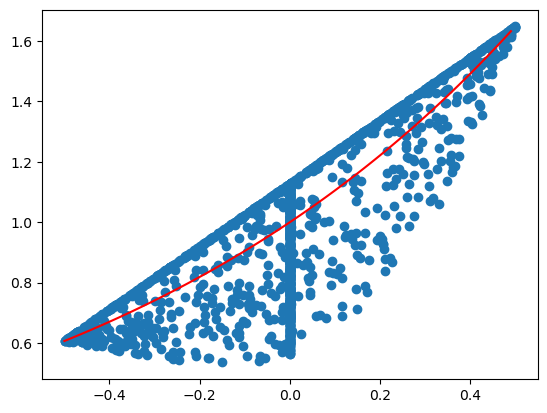

1
1.0297028154092736


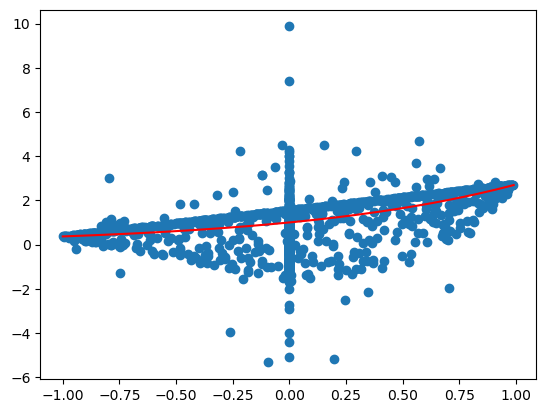

1.1
1.0214415870367515


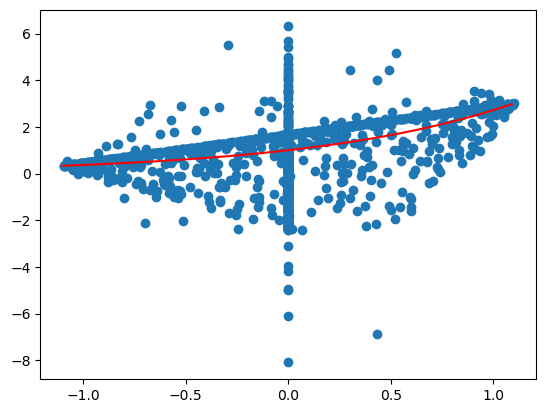

1.2
0.8319053885898093


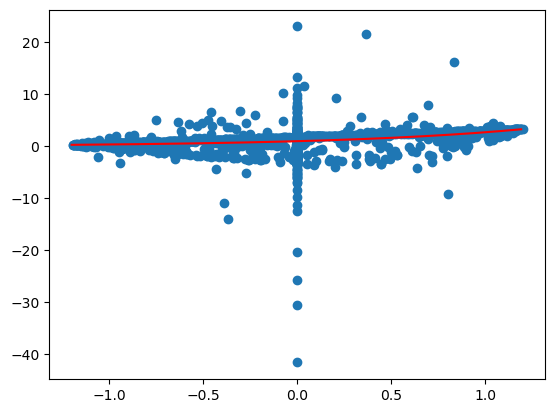

1.5
-2.9698517118869607


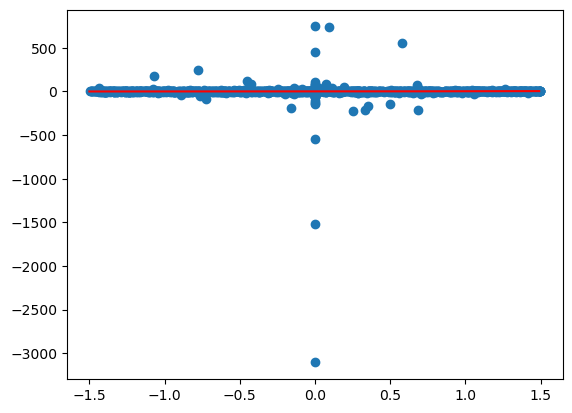

2
-1134.7862404602927


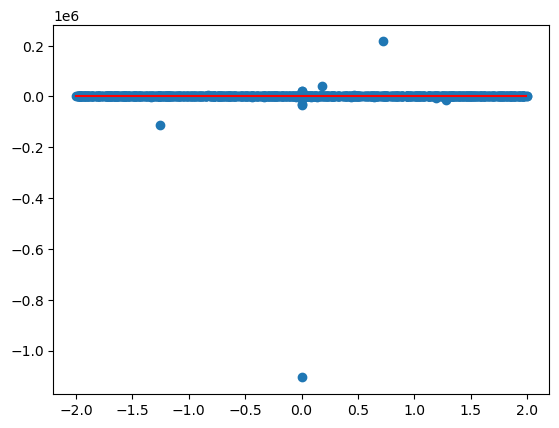

In [36]:
from random import random
from math import exp
import numpy as np
import matplotlib.pyplot as plt

def Pb0(t,b0,b1): return (b1-t)/(b1-b0)
def Pb1(t,b0,b1): return (t-b0)/(b1-b0)
def G(t,s,b0,b1): return -(b1-s)*(t-b0)/(b1-b0) if t<s else - (b1-t)*(s-b0)/(b1-b0) 

def pltaa(t,y0,y1,b0,b1):
    points = []
    def Y(t,y0,y1,b0,b1): 
        sol = Pb0(t,b0,b1)*y0 + Pb1(t,b0,b1)*y1
        l = 2 # russian roulette rate
        if random()*l<1: 
            S = b0+random()*(b1-b0)
            sol += l*G(t,S,b0,b1) * Y(S,y0,y1,b0,b1)*(b1-b0)
        points.append((t,sol))
        return sol 
    def soltest(t,y0,y1,b0,b1,nsim = 10**3): return sum(Y(t,y0,y1,b0,b1) for _ in range(nsim))/nsim
    print(soltest(t,y0,y1,b0,b1))
    x,y = zip(*points)
    plt.scatter(x,y)
    ll = np.arange(b0,b1,0.01)
    plt.plot(ll,np.exp(ll),color = "red")
    plt.show()

for k in [0.5,1,1.1,1.2,1.5,2]:
    print(k)
    pltaa(0,exp(-k),exp(k),-k,k)

$$
X(t_{1},t_{2})=
\begin{bmatrix} 
P(t_{1},b_{0}) & P(t_{1},b_{1})\\
P(t_{2},b_{0}) & P(t_{2},b_{1})
\end{bmatrix} 
\begin{bmatrix} 
y(b_{0})\\
y(b_{1})
\end{bmatrix} 
+
\begin{bmatrix} 
G(t_{1},U_{1}) & G(t_{1},U_{2}) \\
G(t_{2},U_{1}) & G(t_{2},U_{2}) 
\end{bmatrix}
\begin{bmatrix} 
f_{U_{1}}(U_{1}) & 0 \\
0                & f_{U_{2}}(U_{2}) 
\end{bmatrix}
X(U_{1},U_{2})
$$ 

0.5
sol = 0.9606963198979205,q=1


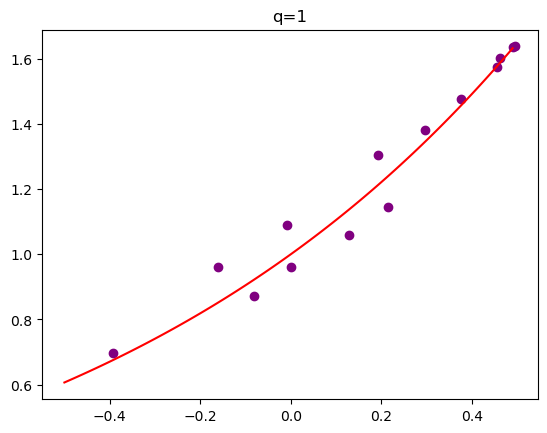

sol = 0.9919531456683569,q=10


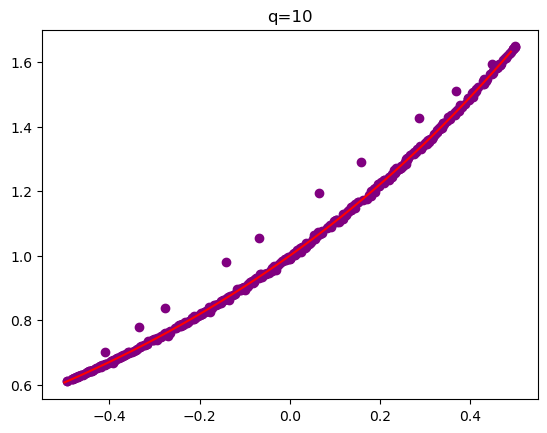

sol = 0.9977990192393714,q=100


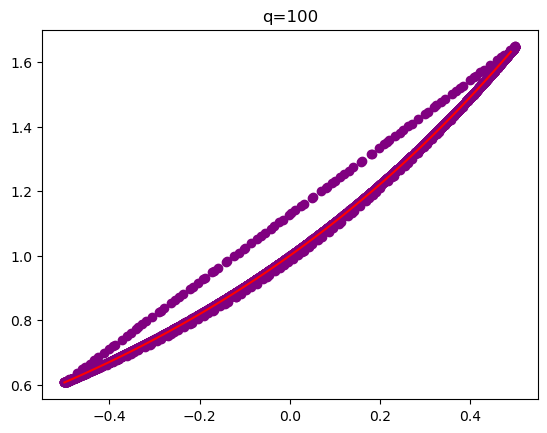

1
sol = 0.9747578754517706,q=1


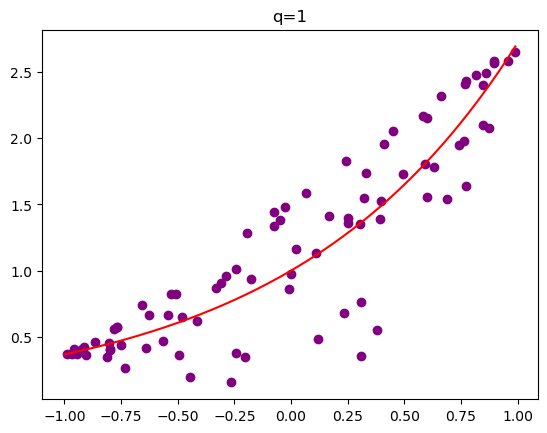

sol = 0.9890956439502987,q=10


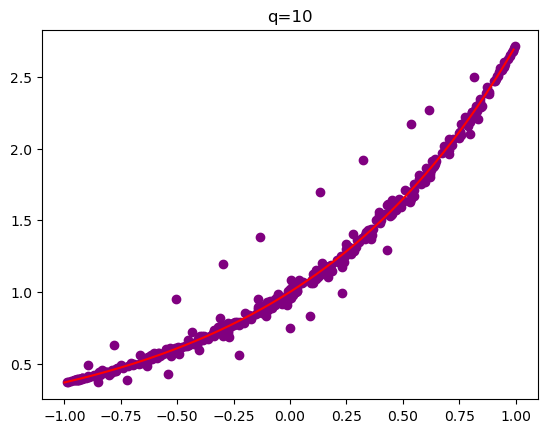

sol = 0.9923980358207758,q=100


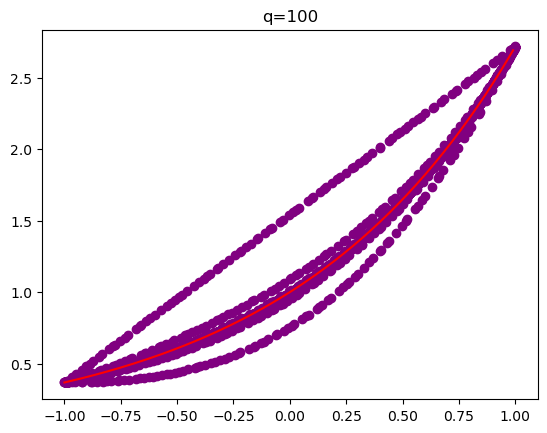

1.5
sol = 0.6049375498207761,q=1


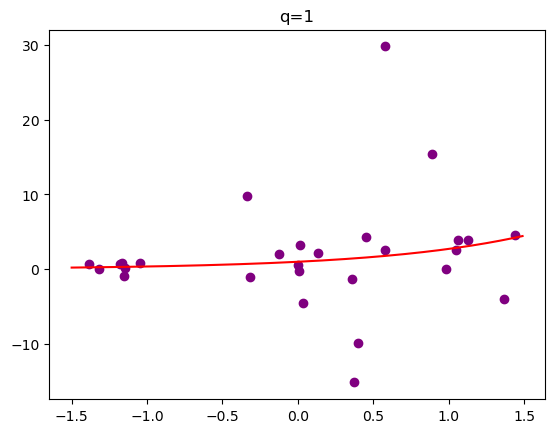

sol = 1.0358801653395626,q=10


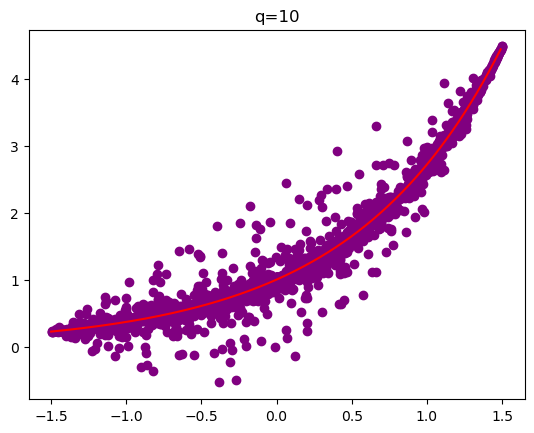

sol = 0.9874805725661671,q=100


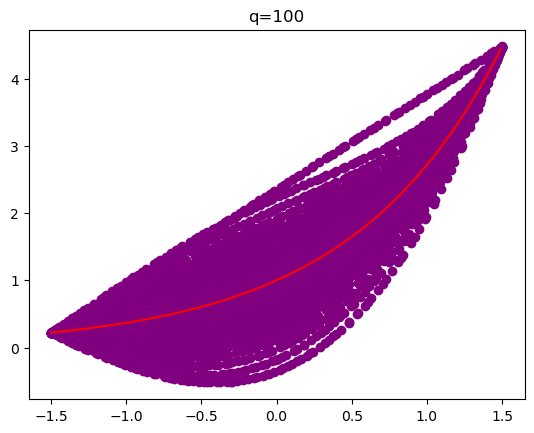

1.7
sol = 3.164530948858153,q=1


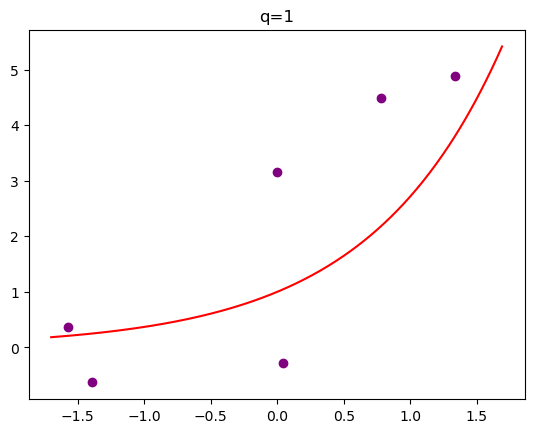

sol = 181.75084588024262,q=10


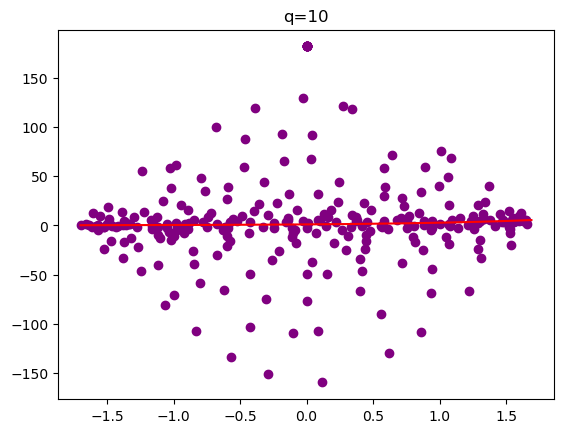

sol = 3412.239507686234,q=100


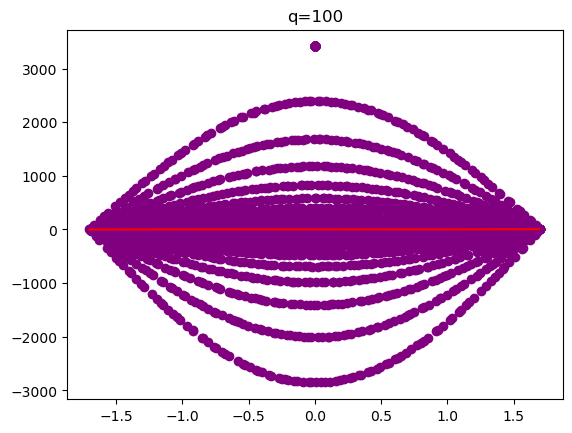

2
sol = 750.4475011787274,q=1


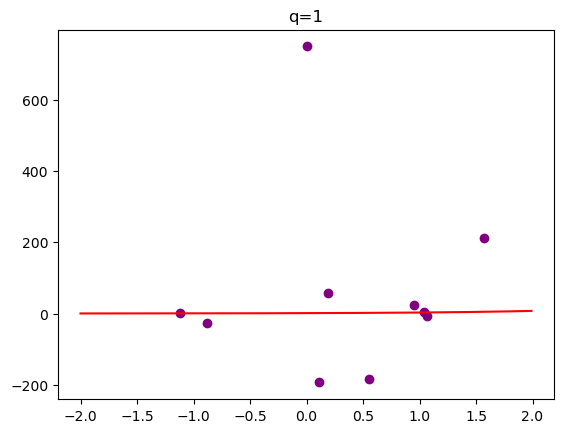

sol = -21834087352.331337,q=10


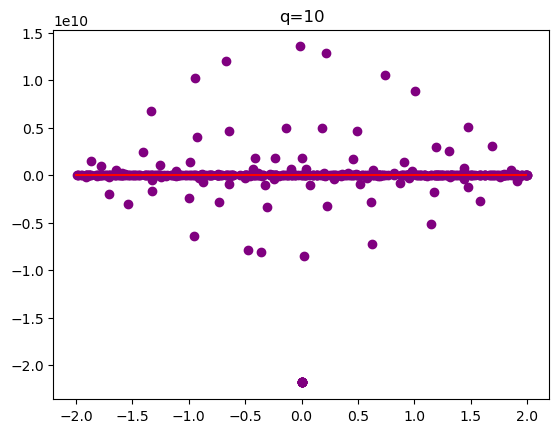

sol = 249652823698.26437,q=100


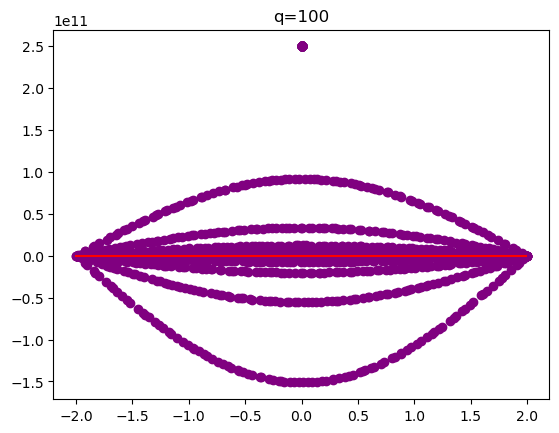

In [24]:
from random import random as U
from math import exp
import numpy as np
import matplotlib.pyplot as plt

def Pb0(t,b0,b1): return (b1-t)/(b1-b0)
def Pb1(t,b0,b1): return (t-b0)/(b1-b0)
def G(t,s,b0,b1): return -(b1-s)*(t-b0)/(b1-b0) if t<s else - (b1-t)*(s-b0)/(b1-b0) 

def pltaa(t,y0,y1,b0,b1,q):
    yy = np.array([y0,y1])
    points = []
    def X(T,y0,y1,b0,b1): 
        bb = np.diag([(b1-b0)/len(T)]*len(T))
        PP = np.array([[Pb0(t,b0,b1),Pb1(t,b0,b1)] for t in T])
        sol = PP @ yy
        l = 1.02 # russian roulette rate
        if U()*l<1: 
            SS = [b0+(U()+j)*(b1-b0)/len(T) for j in range(len(T))]
            GG = np.array([[G(t,S,b0,b1) for S in SS] for t in T]) 
            sol += l*GG @ bb @ X(SS,y0,y1,b0,b1)
        for t,soll in zip(T,sol):
            points.append((t,soll))
        return sol 

    def soltest(t,y0,y1,b0,b1,nsim = 10**0): 
        return sum(X([t]*q,y0,y1,b0,b1) for _ in range(nsim))/nsim
    print(f"sol = {soltest(t,y0,y1,b0,b1)[0]},q={q}")
    x,y = zip(*points)
    plt.scatter(x,y,color="purple")
    ll = np.arange(b0,b1,0.01)
    plt.plot(ll,np.exp(ll),color = "red")
    plt.title(f"q={q}")
    plt.show()

for k in [0.5,1,1.5,1.7,2]:
    print(k)
    pltaa(0,exp(-k),exp(k),-k,k,1)
    pltaa(0,exp(-k),exp(k),-k,k,10)
    pltaa(0,exp(-k),exp(k),-k,k,100)

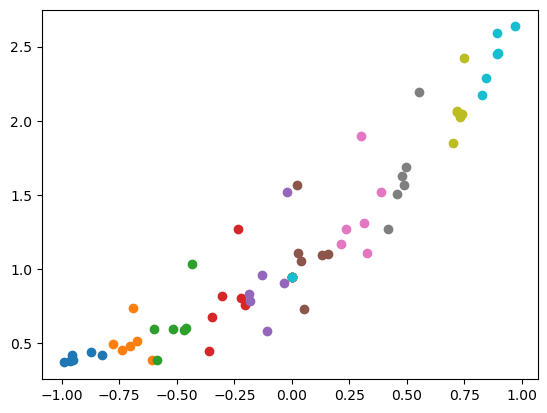

In [4]:
from random import random as U
from math import exp
import numpy as np
import matplotlib.pyplot as plt


def Pb0(t,b0,b1): return (b1-t)/(b1-b0)
def Pb1(t,b0,b1): return (t-b0)/(b1-b0)
def G(t,s,b0,b1): return -(b1-s)*(t-b0)/(b1-b0) if t<s else - (b1-t)*(s-b0)/(b1-b0) 

def get_n_colors(n):
    """
    Returns a list of n different colors using the matplotlib library.
    """
    all_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    if n > len(all_colors):
        colors = all_colors * (n // len(all_colors) + 1)
    else:
        colors = all_colors[:n]
    
    return colors

def X(T,y0,y1,b0,b1): 
    yy = np.array([y0,y1])
    bb = np.diag([(b1-b0)/len(T)]*len(T))
    PP = np.array([[Pb0(t,b0,b1),Pb1(t,b0,b1)] for t in T])
    sol = PP @ yy
    l = 1.1 # russian roulette rate
    if U()*l<1: 
        SS = [b0+(U()+j)*(b1-b0)/len(T) for j in range(len(T))]
        GG = np.array([[G(t,S,b0,b1) for S in SS] for t in T]) 
        sol += l*GG @ bb @ X(SS,y0,y1,b0,b1)

    for t,soll,color in zip(T,sol,get_n_colors(len(T))):
        plt.scatter(t,soll,color = color)
    return sol 

def soltest(t,y0,y1,b0,b1,nsim = 10**1,q=10): 
    return sum(X([t]*q,y0,y1,b0,b1) for _ in range(nsim))/nsim

soltest(0,exp(-1),exp(1),-1,1,1)
plt.show()

[-76119866.71833561 -76119866.71833561 -76119866.71833561
 -76119866.71833561 -76119866.71833561 -76119866.71833561
 -76119866.71833561 -76119866.71833561 -76119866.71833561
 -76119866.71833561 -76119866.71833561 -76119866.71833561
 -76119866.71833561 -76119866.71833561 -76119866.71833561
 -76119866.71833561 -76119866.71833561 -76119866.71833561
 -76119866.71833561 -76119866.71833561]


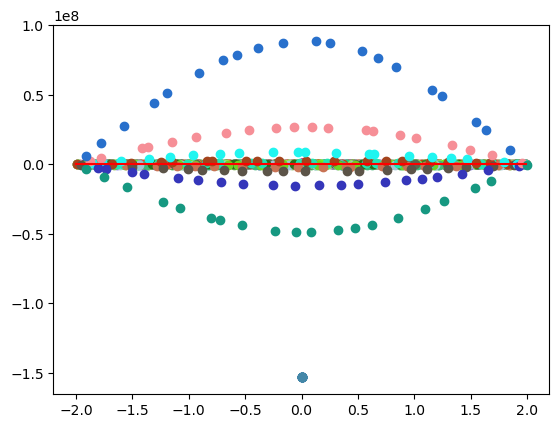

In [28]:

from random import random as U
from math import exp
import numpy as np
import matplotlib.pyplot as plt

def Pb0(t,b0,b1): return (b1-t)/(b1-b0)
def Pb1(t,b0,b1): return (t-b0)/(b1-b0)
def G(t,s,b0,b1): return -(b1-s)*(t-b0)/(b1-b0) if t<s else - (b1-t)*(s-b0)/(b1-b0) 

def X(T,y0,y1,b0,b1): 
    yy = np.array([y0,y1])
    bb = np.diag([(b1-b0)/len(T)]*len(T))
    PP = np.array([[Pb0(t,b0,b1),Pb1(t,b0,b1)] for t in T])
    sol = PP @ yy
    l = 1.1 # russian roulette rate
    if U()*l<1: 
        SS = [b0+(U()+j)*(b1-b0)/len(T) for j in range(len(T))]
        GG = np.array([[G(t,S,b0,b1) for S in SS] for t in T]) 
        sol += l*GG @ bb @ X(SS,y0,y1,b0,b1)

    cc = (U(), U(),U())
    for t,soll in zip(T,sol):
        plt.scatter(t,soll,color = cc)
    return sol 

def soltest(t,y0,y1,b0,b1,nsim = 10**0,q=20): 
    tmp = sum(X([t]*q,y0,y1,b0,b1) for _ in range(nsim))/nsim 
    ll = np.arange(b0,b1,0.01)
    plt.plot(ll,np.exp(ll),color = "red")
    return tmp 

k =2
print(soltest(0,exp(-k),exp(k),-k,k,2))
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4832\1603655226.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dvi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("../../latex/main paper/plots/mainD explosion.png",dvi = 300)


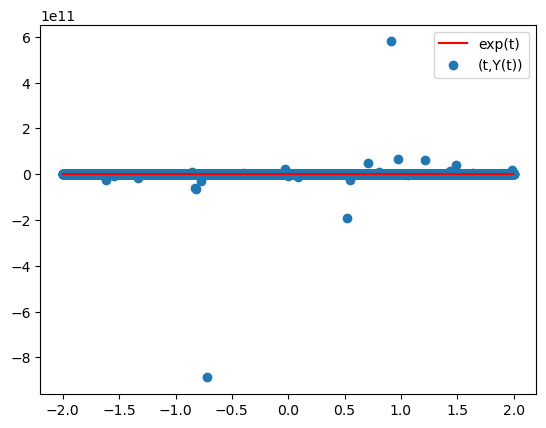

[-7329468.30914638]


In [9]:
from random import random as U
from math import exp
import numpy as np
import matplotlib.pyplot as plt

def Pb0(t,b0,b1): return (b1-t)/(b1-b0)
def Pb1(t,b0,b1): return (t-b0)/(b1-b0)
def G(t,s,b0,b1): return -(b1-s)*(t-b0)/(b1-b0) if t<s else - (b1-t)*(s-b0)/(b1-b0) 

points = []
def X(T,y0,y1,b0,b1): 
    yy = np.array([y0,y1])
    bb = np.diag([(b1-b0)/len(T)]*len(T))
    PP = np.array([[Pb0(t,b0,b1),Pb1(t,b0,b1)] for t in T])
    sol = PP @ yy
    l = 1.1 # russian roulette rate
    if U()*l<1: 
        SS = [b0+(U()+j)*(b1-b0)/len(T) for j in range(len(T))]
        GG = np.array([[G(t,S,b0,b1) for S in SS] for t in T]) 
        sol += l*GG @ bb @ X(SS,y0,y1,b0,b1)

    global points
    for t,soll in zip(T,sol):
        points.append((t,soll))
    return sol 

def soltest(t,y0,y1,b0,b1,nsim = 10**0,q=1): 
    tmp = sum(X([t]*q,y0,y1,b0,b1) for _ in range(nsim))/nsim 
    ll = np.arange(b0,b1,0.01)
    plt.plot(ll,np.exp(ll),color = "red",label = "exp(t)")
    x,y = zip(*points)
    plt.scatter(x,y,label="(t,Y(t))")
    plt.legend()
    # plt.savefig("../../latex/main paper/plots/mainD explosion points.png",dvi = 300)
    plt.show()
    return tmp 

k =2
print(soltest(0,exp(-k),exp(k),-k,k,10**3,1))

C:\Users\Admin\AppData\Local\Temp\ipykernel_4832\2700004296.py:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dvi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("../../latex/main paper/plots/mainD explosion.png",dvi = 300)


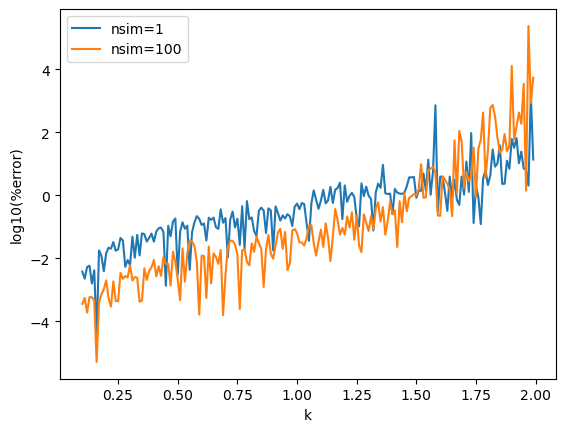

In [52]:
from random import random as U
from math import exp
import numpy as np
import matplotlib.pyplot as plt

def Pb0(t,b0,b1): return (b1-t)/(b1-b0)
def Pb1(t,b0,b1): return (t-b0)/(b1-b0)
def G(t,s,b0,b1): return -(b1-s)*(t-b0)/(b1-b0) if t<s else - (b1-t)*(s-b0)/(b1-b0) 

def X(T,y0,y1,b0,b1): 
    yy = np.array([y0,y1])
    bb = np.diag([(b1-b0)/len(T)]*len(T))
    PP = np.array([[Pb0(t,b0,b1),Pb1(t,b0,b1)] for t in T])
    sol = PP @ yy
    l = 1.2 # russian roulette rate
    if U()*l<1: 
        SS = [b0+(U()+j)*(b1-b0)/len(T) for j in range(len(T))]
        GG = np.array([[G(t,S,b0,b1) for S in SS] for t in T]) 
        sol += l*GG @ bb @ X(SS,y0,y1,b0,b1)
    return sol 


def soltest(t,y0,y1,b0,b1,nsim = 10**0,q=1): 
    return sum(X([t]*q,y0,y1,b0,b1) for _ in range(nsim))/nsim 


q=1
K = np.arange(0.1,2,0.01)
errors = np.array([abs(soltest(0,exp(-k),exp(k),-k,k,1,q)[0]-1) for k in K] )
errors100 = np.array([abs(soltest(0,exp(-k),exp(k),-k,k,10**2,q)[0]-1) for k in K] )

plt.plot(K,np.log(errors)/np.log(10),label="nsim=1")
plt.plot(K,np.log(errors100)/np.log(10),label="nsim=100")
plt.xlabel("k")
plt.ylabel("log10(%error)")
plt.legend()
plt.savefig("../../latex/main paper/plots/mainD explosion.png",dvi = 300)
plt.show()